In [1]:
import os
import shutil
import json
import tempfile
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np

from run_experiments import run_experiments, Result

In [2]:
# set envvars
# os.environ["OS_MEMORY_ALLOC_OVERRIDE"] = "25000000"
# os.environ["ENGINE_PATH"] = "./target/x86_64-apple-darwin/release/hash_engine"
os.environ["RUST_LOG"] = "info"
os.environ["ENGINE_WAIT_TIMEOUT"] = "1000"

In [3]:
# we need cwd to be the engine folder
os.chdir("./..")

In [4]:
# clear the output folders
def clear_outputs():
    try:
        shutil.rmtree('./output')
        shutil.rmtree('./parts')
    except FileNotFoundError:
        pass

In [5]:
def write_to_globals_and_benchmark(src_path: Path, globals_override: dict, num_steps: int):
    clear_outputs()
    with tempfile.TemporaryDirectory() as temp_folder:
        temp_path = shutil.copytree(
            src_path, 
            Path(temp_folder) / src_path.name # Python < 3.8 requires the directory to not already exist for copytree
        )
        
        # override the globals
        globals_path = temp_path / "src" / "globals.json"
        global_properties = json.loads(globals_path.read_text())
        global_properties.update(globals_override)
        globals_path.write_text(json.dumps(global_properties))
        
        # benchmark a single-run
        results = run_experiments(
            project_paths=[temp_path], 
            run_all_experiments=False,
            cli_args=["single-run", "--num-steps", f"{num_steps}"]
        )
        
        return results

In [6]:
def plot_time_and_mem(results):
    agents_to_uss = [(num_agents, res.max_uss_memory) for (num_agents, res) in results]
    agents_to_pss = [(num_agents, res.max_pss_memory) for (num_agents, res) in results]
    agents_to_time = [(num_agents, res.time_to_completion) for (num_agents, res) in results]
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title('Time Taken by Number of Agents')
    ax.set_xlabel('Number of Agents')
    # ax.set_xscale('log')
    ax.set_ylabel('Time Taken (s)')
    ax.plot(*zip(*agents_to_time))
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title('Max PSS by Number of Agents')
    ax.set_xlabel('Number of Agents')
    # ax.set_xscale('log')
    ax.set_ylabel('Max PSS (Proportional Set Size) memory')
    ax.plot(*zip(*agents_to_pss))
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title('Max USS by Number of Agents')
    ax.set_xlabel('Number of Agents')
    # ax.set_xscale('log')
    ax.set_ylabel('Max USS (Unique Set Size) memory')
    ax.plot(*zip(*agents_to_uss))

In [7]:
# src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/2_fields")
# write_to_globals_and_benchmark(src_path, {"num_agents": 5}, num_steps=2)

### Benchmark Number of Agents without Behaviors

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpwo7i2k9q/no_fields single-run --num-steps 10
Time taken: 1.5689036846160889
max_vms_memory: 9318326272
max_rss_memory: 55562240
max_pss_memory: 44196864
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpwkr7d_z8/no_fields single-run --num-steps 10
Time taken: 1.572385311126709
max_vms_memory: 9318342656
max_rss_memory: 58023936
max_pss_memory: 46129152
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp4nc25qis/no_fields single-run --num-steps 10
Time taken: 1.605123519897461
max_vms_memory: 9318440960
max_rss_memory: 62984192
max_pss_memory: 51864576
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.22s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpl8y6573l/no_fields single-run --num-steps 10
Time taken: 2.1765739917755127
max_vms_memory: 9339879424
max_rss_memory: 91693056
max_pss_memory: 81133568
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.27s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpqmcxcizm/no_fields single-run --num-steps 10
Time taken: 5.857015371322632
max_vms_memory: 9529188352
max_rss_memory: 205463552
max_pss_memory: 194020352
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.23s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmplvn5q3kt/no_fields single-run --num-steps 10
Time taken: 46.16076898574829
max_vms_memory: 9581236224
max_rss_memory: 1024167936
max_pss_memory: 1012220928
Running Experiment finished


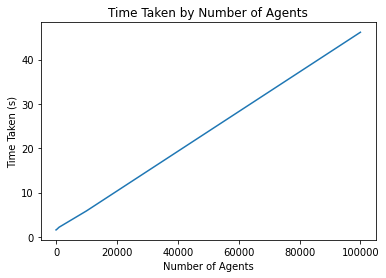

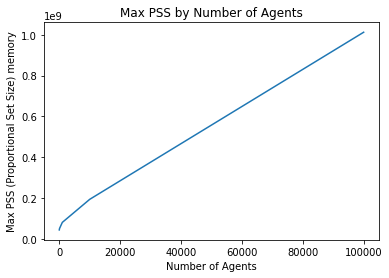

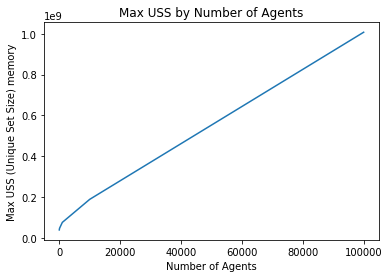

In [8]:
src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/no_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except (AttributeError, IndexError): # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp240b6twq/1_field single-run --num-steps 10
Time taken: 1.569105625152588
max_vms_memory: 9385451520
max_rss_memory: 56705024
max_pss_memory: 44171264
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpm1nq7het/1_field single-run --num-steps 10
Time taken: 1.5836453437805176
max_vms_memory: 9452560384
max_rss_memory: 56631296
max_pss_memory: 46078976
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.22s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpypx8ruu8/1_field single-run --num-steps 10
Time taken: 1.6962523460388184
max_vms_memory: 9318440960
max_rss_memory: 63205376
max_pss_memory: 51914752
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp957semvs/1_field single-run --num-steps 10
Time taken: 2.055863380432129
max_vms_memory: 9318903808
max_rss_memory: 96366592
max_pss_memory: 85335040
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpi21324tk/1_field single-run --num-steps 10
Time taken: 5.428926944732666
max_vms_memory: 9260752896
max_rss_memory: 218697728
max_pss_memory: 207696896
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpp03_uu7x/1_field single-run --num-steps 10
Time taken: 45.22832202911377
max_vms_memory: 10187767808
max_rss_memory: 1271693312
max_pss_memory: 1261867008
Running Experiment finished


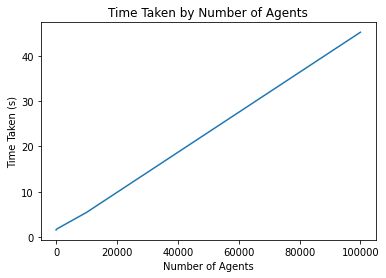

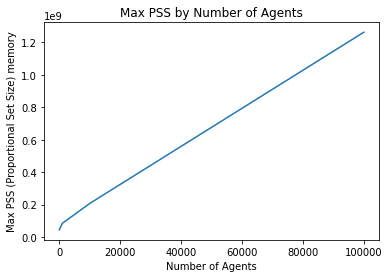

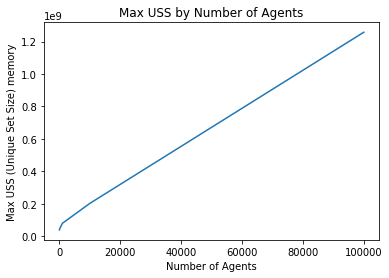

In [9]:
src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/1_field")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpzk18cdeb/2_fields single-run --num-steps 10
Time taken: 1.566241979598999
max_vms_memory: 9452560384
max_rss_memory: 55959552
max_pss_memory: 43908096
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpsr830xn8/2_fields single-run --num-steps 10
Time taken: 1.4621925354003906
max_vms_memory: 9339318272
max_rss_memory: 58155008
max_pss_memory: 46217216
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpzkslvgxu/2_fields single-run --num-steps 10
Time taken: 1.5931105613708496
max_vms_memory: 9385549824
max_rss_memory: 64778240
max_pss_memory: 52308992
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.24s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmph_42nzfv/2_fields single-run --num-steps 10
Time taken: 2.0379109382629395
max_vms_memory: 9474097152
max_rss_memory: 95588352
max_pss_memory: 84822016
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpl5x_mepq/2_fields single-run --num-steps 10
Time taken: 5.625118732452393
max_vms_memory: 9327861760
max_rss_memory: 206807040
max_pss_memory: 196859904
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.23s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp1p7n43oj/2_fields single-run --num-steps 10
Time taken: 47.518590450286865
max_vms_memory: 10201993216
max_rss_memory: 1329631232
max_pss_memory: 1318063104
Running Experiment finished


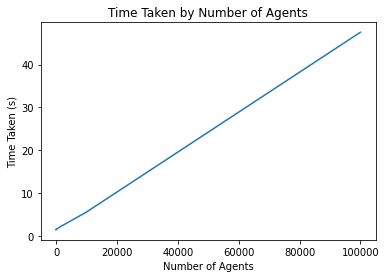

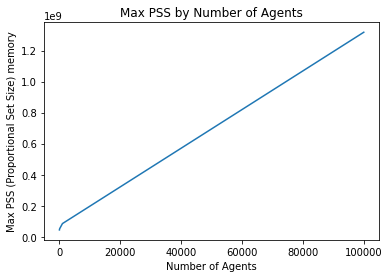

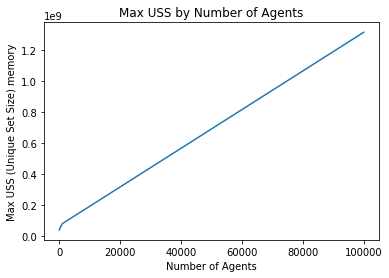

In [10]:
src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/2_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.22s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp0hzxvtom/no_fields single-run --num-steps 10
Time taken: 1.6929504871368408
max_vms_memory: 9318342656
max_rss_memory: 57683968
max_pss_memory: 45201408
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.23s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp0d867axa/no_fields single-run --num-steps 10
Time taken: 1.6040971279144287
max_vms_memory: 9385451520
max_rss_memory: 58777600
max_pss_memory: 47233024
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp4sd5luow/no_fields single-run --num-steps 10
Time taken: 1.7241785526275635
max_vms_memory: 9184223232
max_rss_memory: 67563520
max_pss_memory: 55652352
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpor8_y_64/no_fields single-run --num-steps 10
Time taken: 2.6703972816467285
max_vms_memory: 9319428096
max_rss_memory: 115707904
max_pss_memory: 104327168
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpsqmqurlx/no_fields single-run --num-steps 10
Time taken: 10.54580283164978
max_vms_memory: 9281728512
max_rss_memory: 238489600
max_pss_memory: 227856384
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpzy6m89js/no_fields single-run --num-steps 10
Time taken: 94.99274015426636
max_vms_memory: 10032902144
max_rss_memory: 1390456832
max_pss_memory: 1378313216
Running Experiment finished


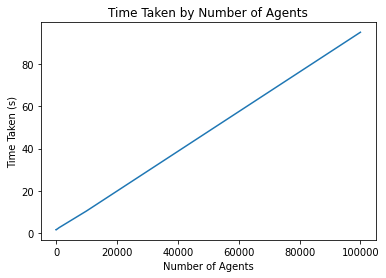

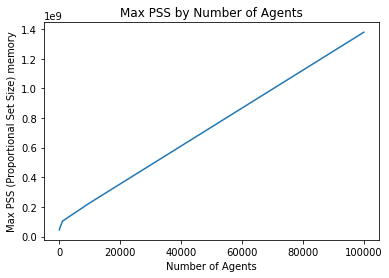

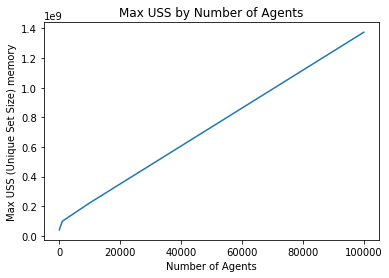

In [11]:
src_path = Path("./benchmarking/experiments/num_agents/empty_behavior/init_js/no_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except (AttributeError, IndexError): # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpsv6tdnt3/1_field single-run --num-steps 10
Time taken: 1.5653696060180664
max_vms_memory: 9452560384
max_rss_memory: 57016320
max_pss_memory: 45130752
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpvyczm8ms/1_field single-run --num-steps 10
Time taken: 1.5729141235351562
max_vms_memory: 9385451520
max_rss_memory: 58380288
max_pss_memory: 46743552
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpsr6yoh66/1_field single-run --num-steps 10
Time taken: 1.7852799892425537
max_vms_memory: 9473634304
max_rss_memory: 67547136
max_pss_memory: 55652352
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpcjxuybm7/1_field single-run --num-steps 10
Time taken: 2.616353750228882
max_vms_memory: 9340403712
max_rss_memory: 113004544
max_pss_memory: 101841920
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp7nvo72yu/1_field single-run --num-steps 10
Time taken: 10.307817935943604
max_vms_memory: 9302704128
max_rss_memory: 236617728
max_pss_memory: 226751488
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.23s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmplpe8lzgq/1_field single-run --num-steps 10
Time taken: 94.09324359893799
max_vms_memory: 10103304192
max_rss_memory: 1406689280
max_pss_memory: 1394780160
Running Experiment finished


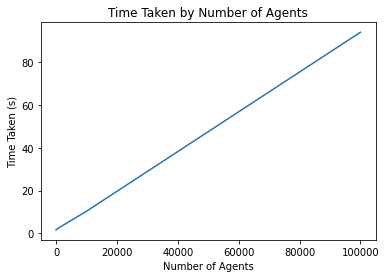

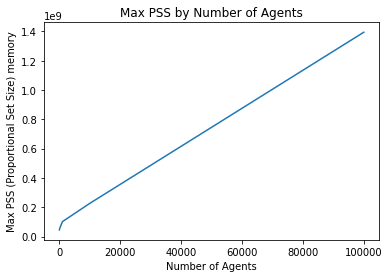

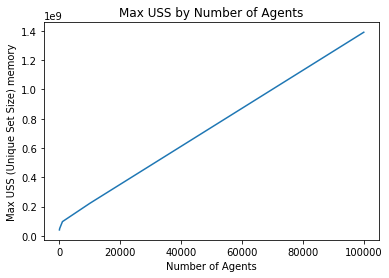

In [12]:
src_path = Path("./benchmarking/experiments/num_agents/empty_behavior/init_js/1_field")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpl3qs4yzv/2_fields single-run --num-steps 10
Time taken: 1.5777063369750977
max_vms_memory: 9251233792
max_rss_memory: 56700928
max_pss_memory: 44727296
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.22s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpbomt6dbj/2_fields single-run --num-steps 10
Time taken: 1.585824966430664
max_vms_memory: 9117016064
max_rss_memory: 58728448
max_pss_memory: 46942208
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpofy3om0m/2_fields single-run --num-steps 10
Time taken: 1.8259007930755615
max_vms_memory: 9272307712
max_rss_memory: 67080192
max_pss_memory: 55521280
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp885s1_eq/2_fields single-run --num-steps 10
Time taken: 2.6323301792144775
max_vms_memory: 9407512576
max_rss_memory: 112418816
max_pss_memory: 102113280
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpptq6s8yc/2_fields single-run --num-steps 10
Time taken: 10.378746271133423
max_vms_memory: 9327861760
max_rss_memory: 232759296
max_pss_memory: 221832192
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.22s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmppx8lxo35/2_fields single-run --num-steps 10
Time taken: 99.47907328605652
max_vms_memory: 10247667712
max_rss_memory: 1405394944
max_pss_memory: 1393526784
Running Experiment finished


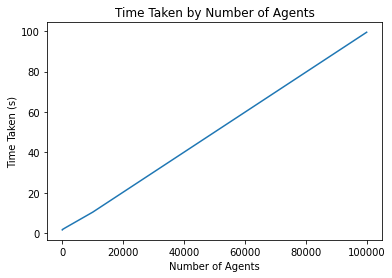

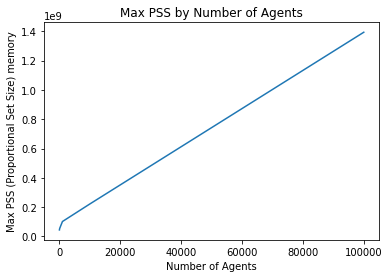

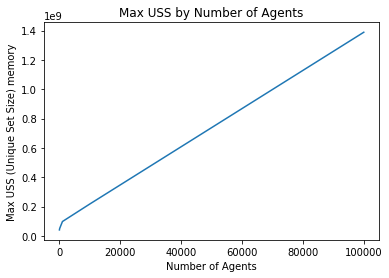

In [13]:
src_path = Path("./benchmarking/experiments/num_agents/empty_behavior/init_js/2_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpi7wm_m50/age_js single-run --num-steps 10
Time taken: 1.590683937072754
max_vms_memory: 9251233792
max_rss_memory: 56365056
max_pss_memory: 45271040
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp7hy49qh7/age_js single-run --num-steps 10
Time taken: 1.6853318214416504
max_vms_memory: 9318342656
max_rss_memory: 58220544
max_pss_memory: 46566400
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp4uuhcl2v/age_js single-run --num-steps 10
Time taken: 1.8009424209594727
max_vms_memory: 9406525440
max_rss_memory: 67768320
max_pss_memory: 55340032
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpxep0dovl/age_js single-run --num-steps 10
Time taken: 2.646409034729004
max_vms_memory: 9474621440
max_rss_memory: 113467392
max_pss_memory: 101753856
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpy1_qonrs/age_js single-run --num-steps 10
Time taken: 10.637934446334839
max_vms_memory: 9415946240
max_rss_memory: 233402368
max_pss_memory: 221979648
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp7i8n0mou/age_js single-run --num-steps 10
Time taken: 95.07520365715027
max_vms_memory: 10301337600
max_rss_memory: 1447510016
max_pss_memory: 1435667456
Running Experiment finished


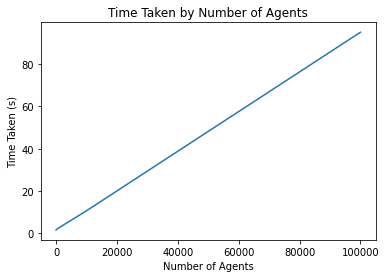

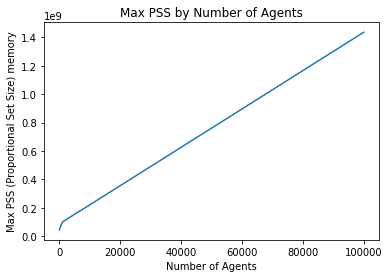

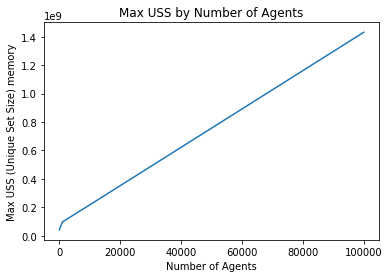

In [14]:
src_path = Path("./benchmarking/experiments/num_agents/age_behavior/init_js/age_js")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except (AttributeError, IndexError): # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

### Current thoughts

Linear growth by number of agents, but even when we don't have behaviors.. That's a little worrying. It shouldn't take 40s to run 10 steps for 100,000 agents where you're not actually doing anything. 

Memory usage scales with agents, but adding a few fields doesn't change much, need to investigate how much of it is down to the built-in fields as again it's far too large currently. Adding a behavior doesn't seem to do much to memory usage, which is somewhat promising but it also implies that even if some steps/agents don't need a lot of data, we load it all anyway.

Adding the age behavior doesn't do much to time or memory usage.